# Exploratory Data Analysis on Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install openpyxl
!pip install xlrd

In [3]:
titanic_df = pd.read_excel(r"C:\Users\19457\OneDrive\Desktop\Bistarx\titanic3.xls", engine="xlrd")

## Exploratory Data Overview

## Before cleaning, understand the data structure.

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
print(titanic_df.head())       



   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [8]:
print(titanic_df.describe())    


            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


### Check Missing Values

In [9]:
print(titanic_df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


## Data Cleaning

In [11]:
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median())


In [12]:
# Convert Age from float to int
titanic_df['age'] = titanic_df['age'].astype(int)

In [13]:
titanic_df['embarked'] = titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0])

In [15]:
if titanic_df['cabin'].isnull().mean() > 0.7: 
    titanic_df.drop('cabin', axis=1, inplace=True)

In [18]:
titanic_df = titanic_df.drop(columns=['body', 'boat'])

In [19]:
titanic_df.drop_duplicates(inplace=True)


In [21]:
titanic_df.drop(['ticket'], axis=1, inplace=True)

In [24]:
print(titanic_df.isnull().sum())

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64


In [23]:
titanic_df.drop(['home.dest'], axis=1, inplace=True)

In [25]:
titanic_df.drop(['fare'], axis=1, inplace=True)

In [26]:
print(titanic_df.isnull().sum())

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64


## Univariate Analysis

### Descriptive Statistics

In [27]:
print(titanic_df.describe())

            pclass     survived          age        sibsp        parch
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000
mean      2.294882     0.381971    29.484339     0.498854     0.385027
std       0.837836     0.486055    12.916721     1.041658     0.865560
min       1.000000     0.000000     0.000000     0.000000     0.000000
25%       2.000000     0.000000    22.000000     0.000000     0.000000
50%       3.000000     0.000000    28.000000     0.000000     0.000000
75%       3.000000     1.000000    35.000000     1.000000     0.000000
max       3.000000     1.000000    80.000000     8.000000     9.000000


In [29]:
print(titanic_df['sex'].value_counts())

sex
male      843
female    466
Name: count, dtype: int64


### Visualizations 

## 1- Age Distribution Histogram

C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


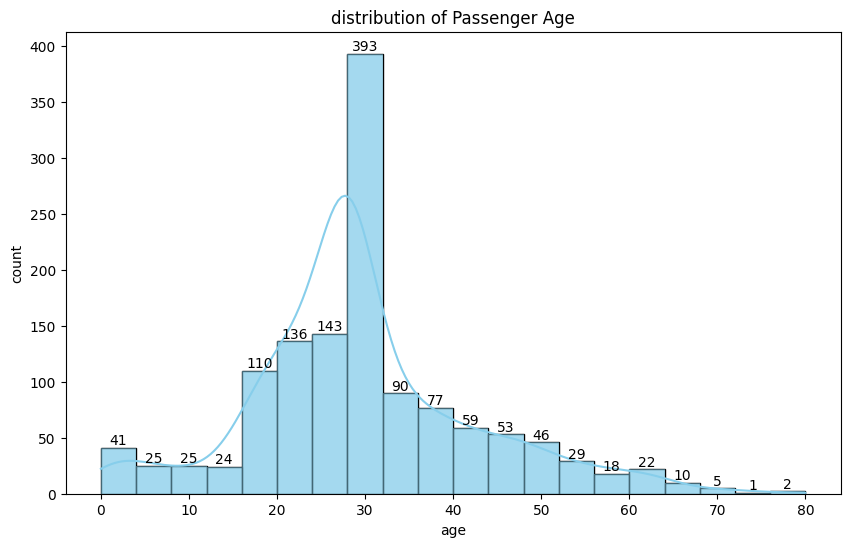

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['age'], bins=20, kde=True, color='skyblue')
plt.title('distribution of Passenger Age')
plt.xlabel('age')
plt.ylabel('count')

counts, bins, patches = plt.hist(titanic_df['age'], bins=20, color='skyblue', alpha=0.5)
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
             ha='center', va='bottom')
plt.show()

### 2-Bar Chart for Categorical Data

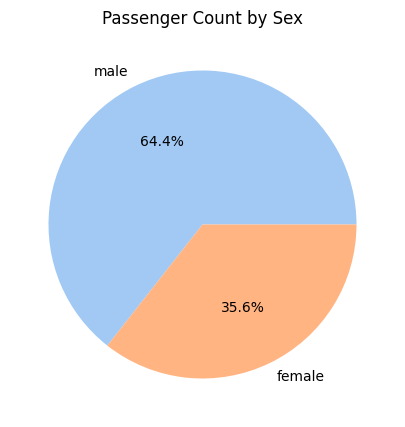

In [42]:
# Count the number of passengers by Sex
sex_counts = titanic_df['sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Passenger Count by Sex')
plt.show()


## Bivariate Analysis

### 1-Bivariate Analysis

C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

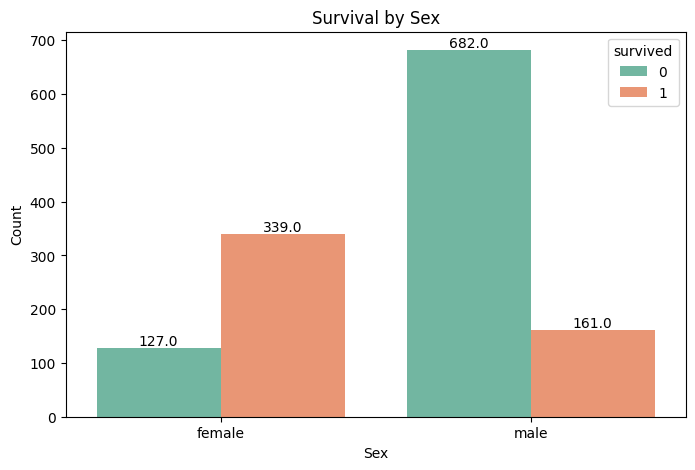

In [41]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='sex', hue='survived', data=titanic_df, palette='Set2')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Annotate the stacked bar chart
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()



### 2-Survival Analysis by Continuous Variable (Age)

C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


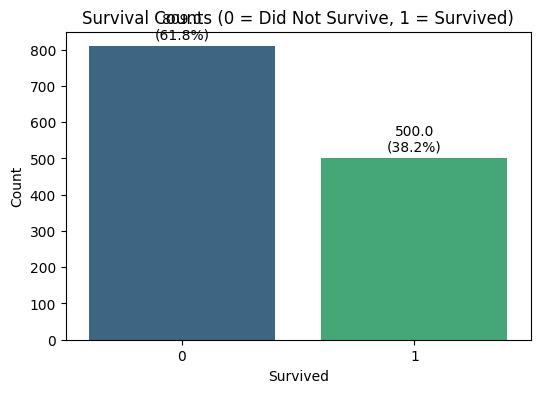

In [52]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Survived', y='age', data=titanic_df, palette='muted')
plt.title('Age Distribution by Survival Status (Violin Plot)')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19457\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

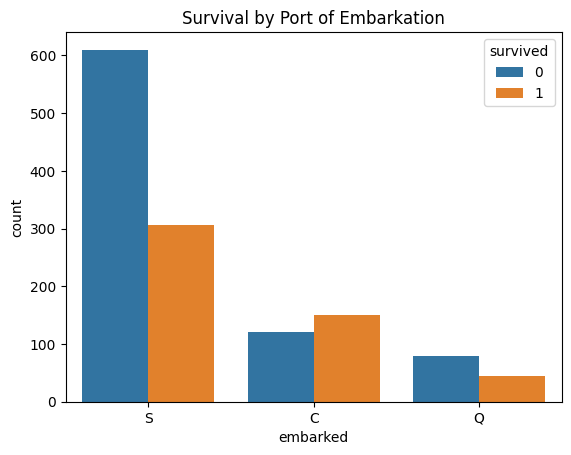

In [47]:
sns.countplot(x='embarked', hue='survived', data=titanic_df)
plt.title('Survival by Port of Embarkation')
plt.show()




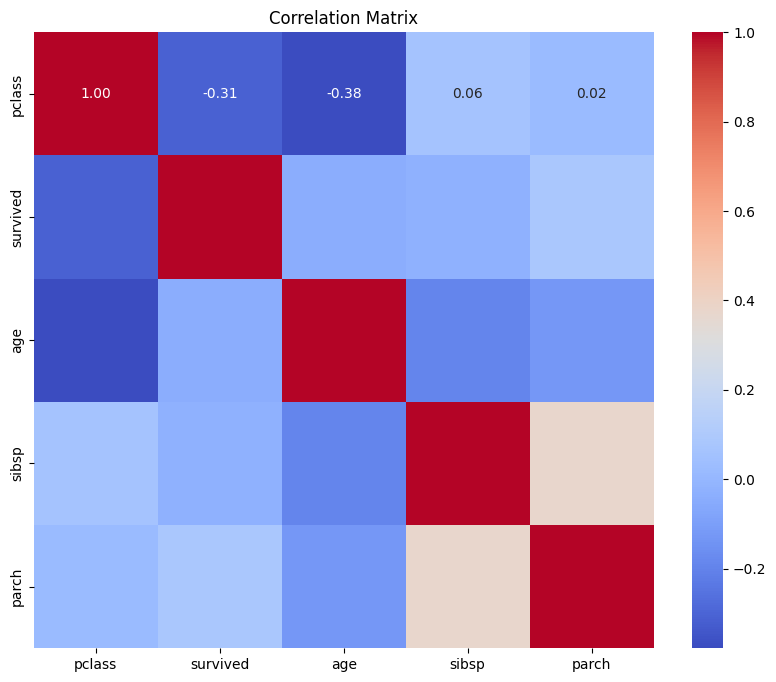

In [48]:
plt.figure(figsize=(10, 8))
corr_matrix = titanic_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
